# Battleships

so I lifted some code frome [here](https://codereview.stackexchange.com/questions/276997/python-battleship-game-code-to-place-random-ships-on-the-board)

It's OK but it's not **modern** or even **moderately good**


In [ ]:
import random

# this is dumb u should use integers :(
EMPTY = '.'
FULL = 'x'

# as I explained you change direction by taking the transpose
DIRECTIONS = (
    (0, 1),  # Right
    (0, -1), # Left
    (1, 0),  # Up
    (-1, 0), # Down
)
MIN_SIZE = 3
MAX_SIZE = 5

def print_board():
    board, ships = generate_board(10, 4)
    for row in board:
        print(' '.join(row))

def generate_board(board_size, n_ships):
    # A board without ship information is ambiguous so return both.
    board = [[EMPTY] * board_size for _ in range(board_size)]
    ships = []
    while len(ships) < n_ships:
        row = random.randint(0, board_size - 1)
        col = random.randint(0, board_size - 1)
        direction = random.choice(DIRECTIONS)
        ship_size = random.randint(MIN_SIZE, MAX_SIZE)
        ship = generate_ship(board, row, col, ship_size, direction)
        if ship:
            ships.append(ship)
            for r, c in ship:
                board[r][c] = FULL
    return (board, ships)


#basically redundant if you know how to use numpy
def generate_ship(board, row, col, ship_size, direction):
    r = row
    c = col
    dr, dc = direction
    cells = []
    for _ in range(ship_size):
        if is_empty(board, r, c):
            cells.append((r, c))
            r += dr
            c += dc
        else:
            return None
    return cells

#totally redundant with numpy/matplotlib
def is_empty(board, row, col):
    try:
        return min(row, col) >= 0 and board[row][col] == EMPTY
    except IndexError:
        pass
    return False

print_board()

In [620]:
#M = generate_board(20, 4)

In [131]:
list(zip(*np.where(M == 5)))

[(3, 2), (4, 2), (5, 2), (6, 2), (7, 2)]

In [40]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_board(board_size=10, 
                   ship_sizes=(2,5),
                   num_ships=7)->np.ndarray:
    
    MIN_SIZE, MAX_SIZE = ship_sizes
    
    board = np.zeros((board_size+2, board_size+2), dtype=int)

    for k in range(num_ships):
        ship_size = random.randint(MIN_SIZE, MAX_SIZE)
        
        if random.random() > .5:
            board = board.T
        
        #this is dumb and I'll fix it later probably with a convolution ;)
        for _ in range(200):
            row = random.randint(1, board_size - ship_size - 1)
            col = random.randint(1, board_size )
            if np.all(board[row:row + ship_size, col]== 0):
                break #found a slot
        else:
            MAX_SIZE -=1
            continue
            
        board[row-1:row+ship_size+1, col-1:col+2] = 1
        board[row:row+ship_size, col] = k + 2
        
    return board

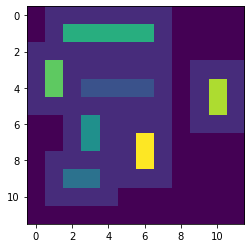

In [713]:
B = generate_board()
plt.imshow(B);

In [58]:
B[(1,1)]

7

---

# this is a simple queue of tasks

In [706]:
class Todo():
    def __init__(self):
        self.queue = []
        # this is a hack to stop two deletions 
        self.running = False
    
    def get(self): 
        xx = self.queue[-1].pop(0)
        self.running = True
        #housekeeping
        if len(self.queue[-1]) == 0 :
            self.running = False
            self.queue.pop()
            
        return xx
        
    def __add__(self,other):
        self.running = True
        self.queue.append(other)
        
    def kill_path(self):
        # apparently it doesn't like pop here
        if self.running:
            self.queue = self.queue[:-1]
        
    def empty(self):
        return len(self.queue) == 0
    

        

In [723]:
sz = B.shape[0]
G = np.zeros_like(B) # global
to_do = Todo() # global

# ships can't touch so easy

def guess(sz):
    def search():
        while True:
            gg = np.random.randint(1, high=sz-1, size=2)
            if G[tuple(gg)] == 0 : break
        return gg
    
    gg = to_do.get() if not to_do.empty() else search()
    pt = tuple(gg)

    if B[pt]  > 1:
        
        G[pt] = 10
        # ugly
        if to_do.empty():
            print('first hit',pt)
            L = [gg + [-k,0] for k in range(1,6) if gg[0] - k > 0]
            R = [gg + [k,0]  for k in range(1,6) if (gg[0] + k) < sz+1]
            D = [gg + [0,-k] for k in range(1,6) if gg[1] - k > 0]
            U = [gg + [0,k]  for k in range(1,6) if (gg[1] + k) < sz+1]
           
            for k,_ in enumerate([L,R,D,U]):
                #dumb check but necessary
                if _ : 
                    to_do + _
                    
    else:
        G[pt] = -1
        if to_do:
            to_do.kill_path() #abandon current path
            
    return pt

imgs = []
H = np.zeros_like(G)
for _ in range(100):
    x,y = guess(sz)
    H = 0*H
    H[G>0] = 10 
    #sprite explosion should be on a different layer :(
    H[x-1:x+2,y-1:y+2] = 8
    imgs.append(H + B)


#plt.imshow(imgs[-1]);


first hit (1, 3)
first hit (8, 6)
first hit (7, 3)
first hit (4, 6)
first hit (4, 1)
first hit (4, 10)
first hit (9, 3)


TypeError: 'FuncAnimation' object is not subscriptable

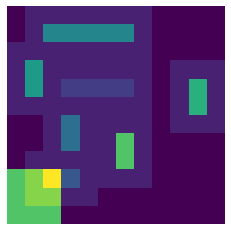

In [729]:
anim = HTML(plot_images(imgs))

In [728]:
anim

NameError: name 'anim' is not defined

TypeError: 'FuncAnimation' object is not subscriptable

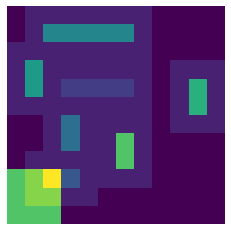

In [727]:
anim = HTML(plot_images(imgs))
writervideo = animation.FFMpegWriter(fps=60)
anim.save('increasingStraightLine.mp4', writer=writervideo)

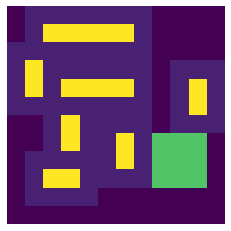

In [730]:
HTML(plot_images(imgs).to_html5_video())

In [674]:
to_do.queue

[]

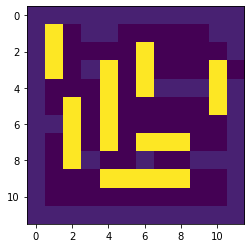

In [695]:
plt.imshow(G);

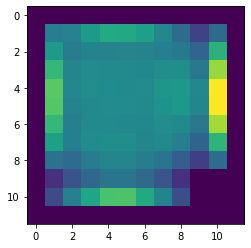

In [4]:
X = np.zeros_like(generate_board())
for k in range(10000):
    bb = generate_board()
    #if not bb: continue
    bb[bb<3] = 0
    bb[bb>0] = 1
    X = X + bb

#X[X< 20] = 0
plt.imshow(X);

In [275]:
X = [[1]*3,[2]*10]

In [622]:
import  matplotlib.animation

from matplotlib import animation

from IPython.display import HTML
%matplotlib inline

def plot_images(img_list):
    
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])

  anim = animation.FuncAnimation(fig,
                                 animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=200, 
                                 blit=True)
  return anim

# use like this
HTML(plot_images(imgs).to_html5_video())